<a href="https://colab.research.google.com/github/alexaziegler/forecast-predictive-model/blob/main/exploratory_data_analysis_for_forecast_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory data analysis investigating my newly generated synthetic dataset. Since this is my first time using Gretel to generate synthetic data, I wanted to make sure everything was generated as expected. I ended up also using Google Gemini to generate some interesting Seaborn visualizations as well. Check it out!

Step 1. Importing the relevant libraries and connecting my new dataset file.

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset_synth-sales-opportunity-data.csv')

Basic exploratory data analysis: reviewing the first five rows, shape, and getting info about data types

In [ ]:
data.head()

,opportunity_id,opportunity_category,opportunity_stage,opportunity_stage_detail,opportunity_forecast_category,opp_create_date,opp_close_date,quantity,unit_price,account_vertical,account_segment,support_tickets,lead_source,sales_rep_notes,sales_territory,account,opportunity_value
0,OPP-876E8ABD,New Logo,Stage 1 - Qualified,Identify Pain,Qualified Pipeline,2022-04-23,2022-05-30,58729,52,Financial,Enterprise,4,Assisted Conversion,**OPP-876E8ABD Progress Update:**\n\n**Identif...,City: New York\nCountry: USA,QuantumLabs,58729 * 52
1,OPP-C3D07FDD,Services,Stage 3 - Proposal/Quote,Confirm Procurement Steps,Commit,2023-08-28,2023-10-06,52592,1169,Government,Upper Mid-Market,3,Channel,**OPP-C3D07FDD Progress Update:**\n\n- **Procu...,"Lakeland, USA",GovTech Innovations,52592 * 1169
2,OPP-463A5852,Upsell,Stage 5 - Closed Lost,Track closed lost reason,Closed Lost,2025-10-14,2026-02-03,40933,1294,Manufacturing,Strategic,4,Upsell Pathway,**OPP-463A5852 Progress Description:**\n\n- **...,"Yukon, Oklahoma, USA.",IndusTech Manufacturing,40933 * 1294
3,OPP-8C49F25B,Expansion,Stage 1 - Qualified,Assign Champion,Qualified Pipeline,2023-10-30,2024-01-26,82176,490,Manufacturing,SMB,6,Marketing Channel,**OPP-8C49F25B Progress Update:**\n\n- **Assig...,"City: Portland, Country: USA",Alumitech Manufacturing,82176 * 490
4,OPP-CC05B960,Upsell,Stage 0 - New,Qualify Lead,New Pipeline,2023-11-05,2024-02-23,93289,1132,Cybersecurity,Partner,1,Upsell Campaign,**OPP-CC05B960 Progress Update:**\n\n- **Quali...,City: Milwaukee\nCountry: USA\nPartner: Midwest,VaultGuardian,93289 * 1132


In [ ]:
# checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 10000 rows and 17 columns.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   opportunity_id                 10000 non-null  object        
 1   opportunity_category           10000 non-null  object        
 2   opportunity_stage              10000 non-null  object        
 3   opportunity_stage_detail       10000 non-null  object        
 4   opportunity_forecast_category  10000 non-null  object        
 5   opp_create_date                10000 non-null  datetime64[ns]
 6   opp_close_date                 10000 non-null  datetime64[ns]
 7   quantity                       10000 non-null  int64         
 8   unit_price                     10000 non-null  int64         
 9   account_vertical               10000 non-null  object        
 10  account_segment                10000 non-null  object        
 11  support_tickets 

I noticed that the data columns were not generated by Gretel as date, so changing the data type in case that causes problems later

In [ ]:
# changing the data type of Date column
data['opp_create_date'] = pd.to_datetime(data['opp_create_date'])
data['opp_close_date'] = pd.to_datetime(data['opp_close_date'])

In this synthetic dataset there were no duplicates

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
opp_create_date,10000,2023-12-29 16:20:21.120000,2022-01-01 00:00:00,2023-01-01 00:00:00,2023-12-29 00:00:00,2024-12-25 00:00:00,2025-12-30 00:00:00,NaN
opp_close_date,10000,2024-02-27 09:17:51.360000,2022-01-05 00:00:00,2023-02-28 00:00:00,2024-02-29 00:00:00,2025-02-22 00:00:00,2026-04-17 00:00:00,NaN
quantity,10000.0,50049.6403,5.0,25285.25,50360.0,75244.75,99995.0,28776.382386
unit_price,10000.0,767.7344,17.0,401.0,770.0,1133.25,1500.0,426.438895
support_tickets,10000.0,3.0183,0.0,2.0,3.0,4.0,8.0,1.45168


Part of using Gretel is the ability to create LLM generated columns. I'm curious what are the total number of unique values that were generated by the AI

In [ ]:
# let's check the total number of unique values in LLM generated columns
data['sales_territory'].nunique()

5746

In [ ]:
data['account'].nunique()

2549

In [ ]:
data['lead_source'].nunique()

257

I might have done something wrong with the expression sampler column, so fixing it to be the actual value I needed

In [ ]:
# fixing opportunity value column
data['opp_value'] = data['quantity'] * data['unit_price']

In [ ]:
# Drop the original opportunity value and create a new DataFrame
new_data = data.drop(['opportunity_value'], axis=1)

# Display the first few rows of the new DataFrame
print(new_data.head())

# Display information about the new DataFrame
new_data.info()

  opportunity_id opportunity_category         opportunity_stage  \
0   OPP-876E8ABD             New Logo       Stage 1 - Qualified   
1   OPP-C3D07FDD             Services  Stage 3 - Proposal/Quote   
2   OPP-463A5852               Upsell     Stage 5 - Closed Lost   
3   OPP-8C49F25B            Expansion       Stage 1 - Qualified   
4   OPP-CC05B960               Upsell             Stage 0 - New   

    opportunity_stage_detail opportunity_forecast_category opp_create_date  \
0              Identify Pain            Qualified Pipeline      2022-04-23   
1  Confirm Procurement Steps                        Commit      2023-08-28   
2   Track closed lost reason                   Closed Lost      2025-10-14   
3            Assign Champion            Qualified Pipeline      2023-10-30   
4               Qualify Lead                  New Pipeline      2023-11-05   

  opp_close_date  quantity  unit_price account_vertical   account_segment  \
0     2022-05-30     58729          52        Finan

# Create some data visualizations to explore the data further

I want to filter out closed opportunities to only review pipeline

<ipython-input-33-8535cc6e3bf0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['opportunity_forecast_category'] = pd.Categorical(filtered_data['opportunity_forecast_category'], categories=order, ordered=True)


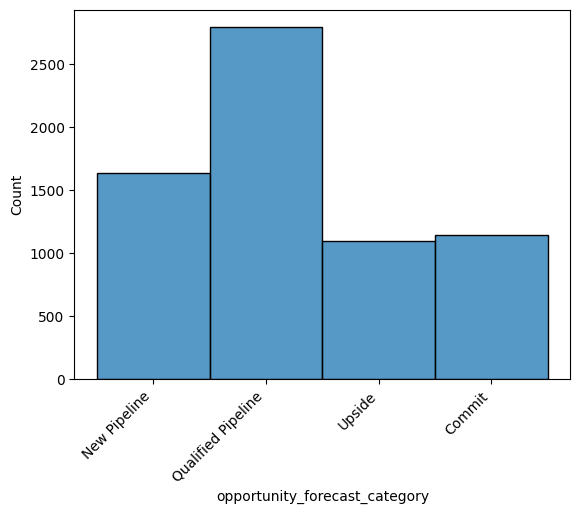

In [ ]:
# Filter out rows where 'opportunity_forecast_category' is 'Closed Won' or 'Closed Lost'
filtered_data = new_data[~new_data['opportunity_forecast_category'].isin(['Closed Won', 'Closed Lost'])]

#define desired order for x-axis
order = ['New Pipeline', 'Qualified Pipeline', 'Upside', 'Commit']

# Convert the 'opportunity_forecast_category' column to a categorical type with the specified order
filtered_data['opportunity_forecast_category'] = pd.Categorical(filtered_data['opportunity_forecast_category'], categories=order, ordered=True)

# Create the histogram with the filtered data and specified order
sns.histplot(data=filtered_data, x='opportunity_forecast_category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.show()

I want to check out a correlation heatmap

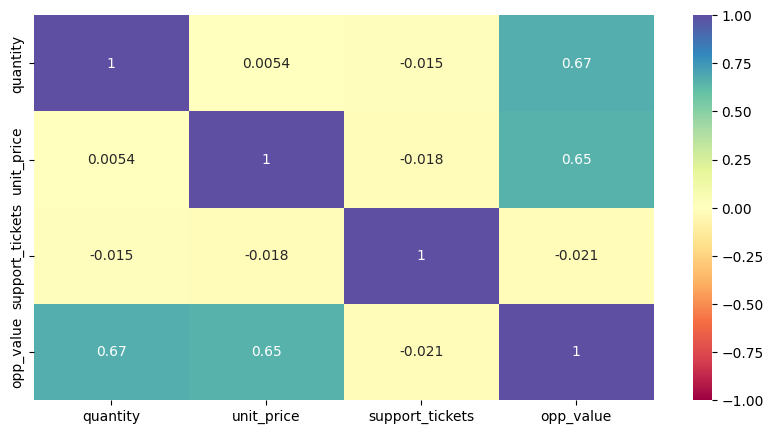

In [ ]:
# Select only the numeric columns for correlation
numeric_data = data.select_dtypes(include=np.number)

# Drop the 'opportunity_id' column if it exists and is numeric
if 'opportunity_id' in numeric_data.columns:
    numeric_data = numeric_data.drop('opportunity_id', axis=1)

# Create the heatmap
plt.figure(figsize=(10,5))
sns.heatmap(numeric_data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

The numerical sampler columns I set up in Gretel were mostly uniform so not surprised

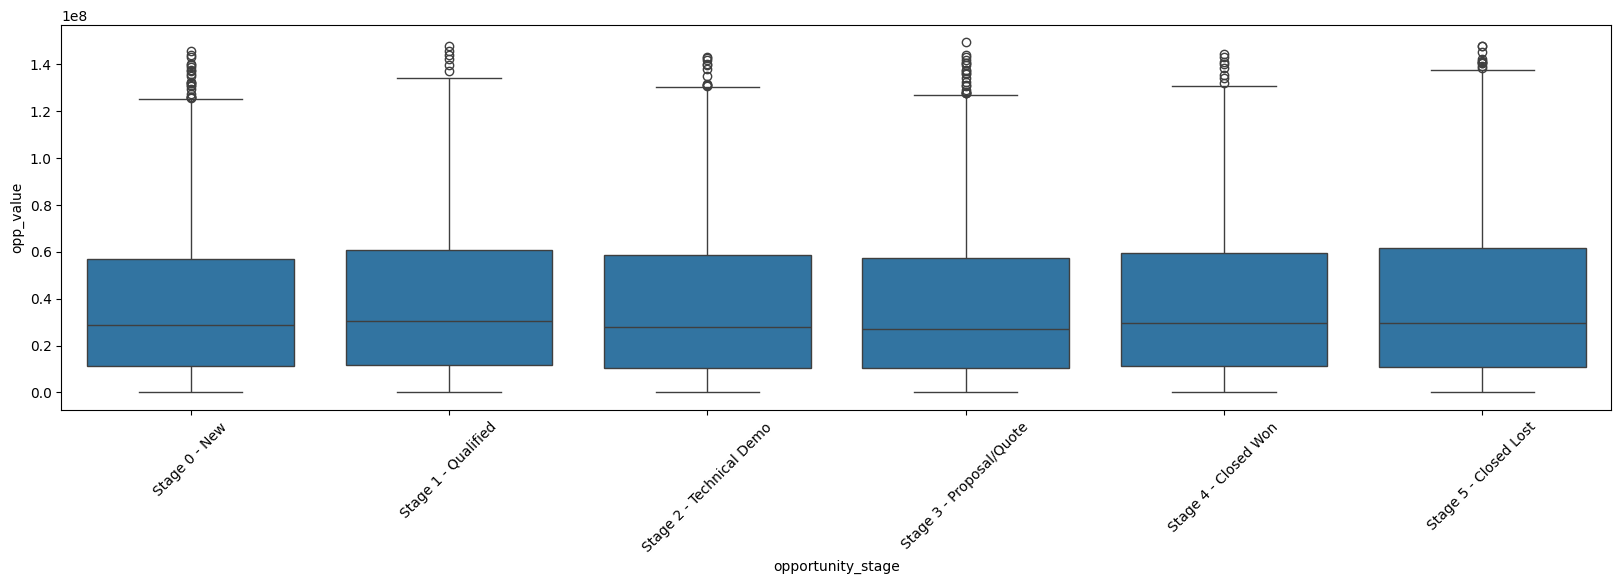

In [ ]:
stage_order = ['Stage 0 - New', 'Stage 1 - Qualified','Stage 2 - Technical Demo', 'Stage 3 - Proposal/Quote','Stage 4 - Closed Won', 'Stage 5 - Closed Lost']

plt.figure(figsize=(20,5))
sns.boxplot(data=data,x='opportunity_stage',y='opp_value',order=stage_order,showfliers=True) # turning off outliers
plt.xticks(rotation=45)
plt.show()

Visualizing how much pipeline is per forecast category. This visualization is for total number of opportunities but typically would be in opportunity value

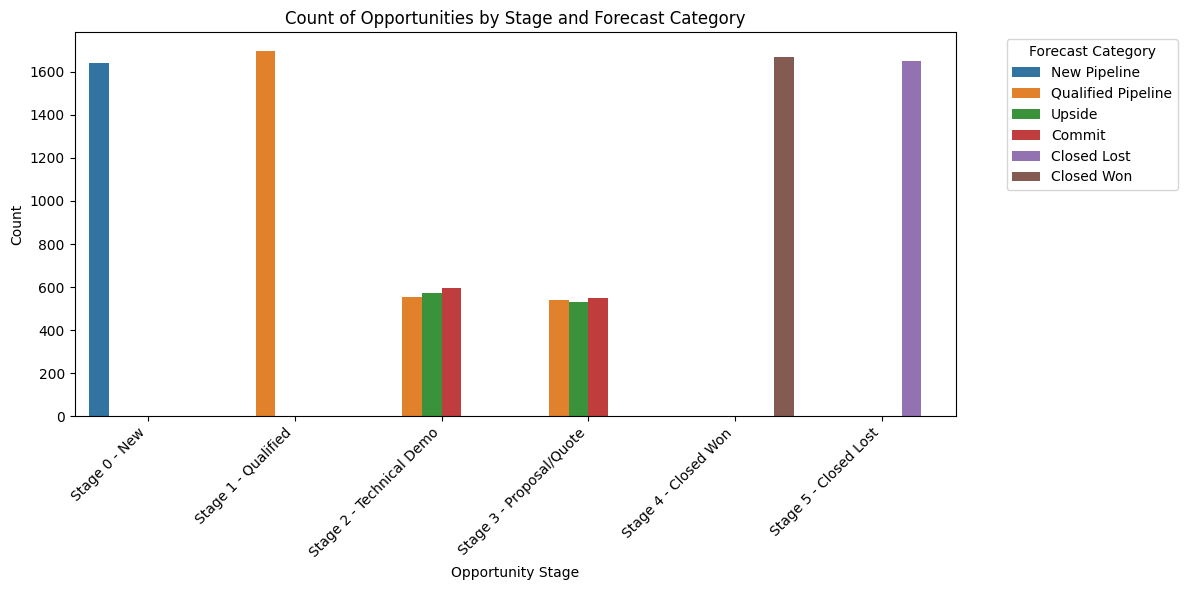

In [ ]:
# Define the desired order for the x-axis and hue
stage_order = ['Stage 0 - New', 'Stage 1 - Qualified', 'Stage 2 - Technical Demo', 'Stage 3 - Proposal/Quote', 'Stage 4 - Closed Won', 'Stage 5 - Closed Lost']
forecast_order = ['New Pipeline', 'Qualified Pipeline', 'Upside', 'Commit', 'Closed Lost', 'Closed Won']


plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
sns.countplot(data=data, x='opportunity_stage', hue='opportunity_forecast_category',
              order=stage_order, hue_order=forecast_order)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.xlabel('Opportunity Stage')
plt.ylabel('Count')
plt.title('Count of Opportunities by Stage and Forecast Category')
plt.legend(title='Forecast Category', bbox_to_anchor=(1.05, 1), loc='upper left') # Position legend outside the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

One of the LLM generated columns was lead source, which is the sales, partner or marketing activity where the opportunity was originated. In a follow up project I may use this same data for an attribution analysis. In the mean time, I want a clean visualization so creating buckets. The frequency threshold is less than 5% of all occurrences which buckets over 200 unique values into 34.

In [ ]:
# Get the value counts of lead_source
lead_source_counts = data['lead_source'].value_counts()

# Define a threshold for infrequent categories (e.g., less than 5% of total occurrences)
threshold = len(data) * 0.005
infrequent_lead_sources = lead_source_counts[lead_source_counts < threshold].index

# Create a new column 'lead_source_bucketed'
data['lead_source_bucketed'] = data['lead_source'].apply(lambda x: 'Other' if x in infrequent_lead_sources else x)

# Check the unique values and counts in the new bucketed column
print("Unique values in original 'lead_source':", data['lead_source'].nunique())
print("Unique values in bucketed 'lead_source_bucketed':", data['lead_source_bucketed'].nunique())
print("\nValue counts for bucketed 'lead_source_bucketed':")
print(data['lead_source_bucketed'].value_counts())

Unique values in original 'lead_source': 257
Unique values in bucketed 'lead_source_bucketed': 34

Value counts for bucketed 'lead_source_bucketed':
lead_source_bucketed
Other                               1665
Touchpoint                          1131
Multi-Channel Campaign               865
Marketing Channel                    655
Digital Marketing Campaign           589
Upsell Campaign                      517
Expansion Activity                   464
Channel                              403
Touchpoint Type                      364
Touchpoint Category                  347
Digital Marketing Campaigns          293
Expansion Channel                    241
Upsell Touchpoint                    234
Expansion Activities                 227
Touchpoint Channel                   198
Upsell Activity                      193
Expansion Campaign                   160
Assisted Conversion                  156
Renewal Campaign                     127
Upsell Contribution                  126
Expansion 

I leveraged Gemini to help with this part, which was really helpful because I got to get very specific on color palettes and formatting which is usually a pain. This visualization is to see the forecast category composition per lead source bucketed. For example, there is a ton of qualified pipeline in "multi-channel marketing" lead source but none in "upsell pathway".

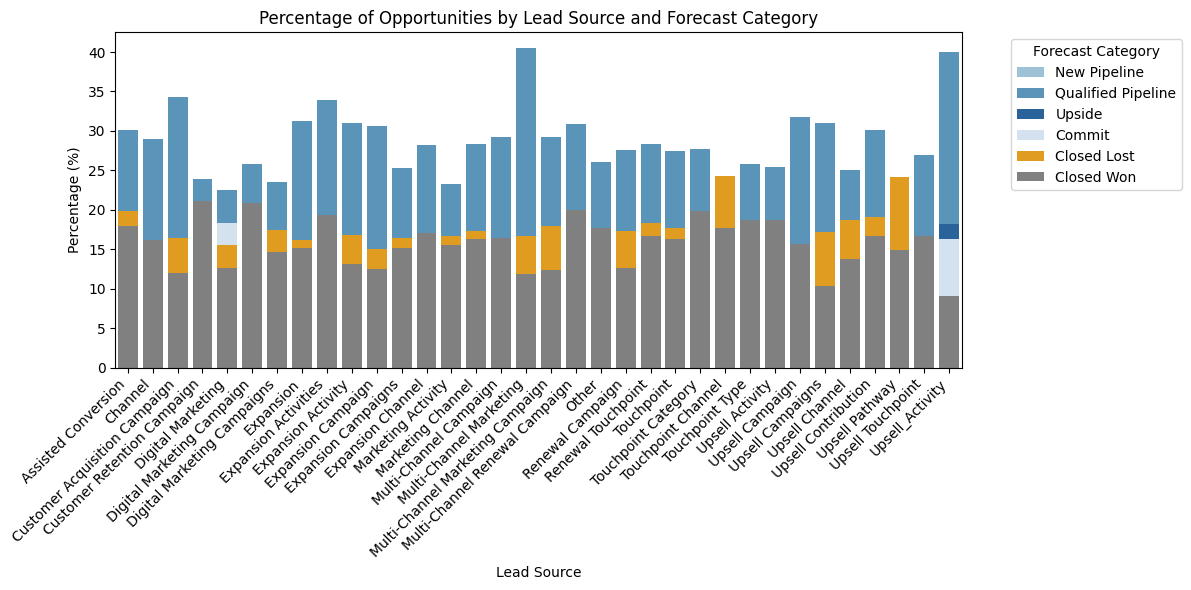

In [ ]:
# Calculate the percentage for stacking
# Group by lead source and forecast category, then count the occurrences
grouped_counts = data.groupby(['lead_source_bucketed', 'opportunity_forecast_category']).size().reset_index(name='count')
# Group by lead source to get the total count for each lead source
lead_source_totals = data.groupby('lead_source_bucketed').size().reset_index(name='total')
# Merge the counts with the totals to calculate percentage
merged_data = pd.merge(grouped_counts, lead_source_totals, on='lead_source_bucketed')
merged_data['percentage'] = (merged_data['count'] / merged_data['total']) * 100

# Define a custom color palette
# Assign specific colors to 'Closed Won' and 'Closed Lost'
# Use a colormap for the other categories (gradients of blue)
# Identify the unique forecast categories
unique_forecast_categories = merged_data['opportunity_forecast_category'].unique()

# Separate the categories that need specific colors
specific_colors = {'Closed Won': 'gray', 'Closed Lost': 'orange'}
other_categories = [cat for cat in unique_forecast_categories if cat not in specific_colors]

# Sort the other categories to ensure consistent color mapping
other_categories.sort()

# Create a colormap for the other categories (gradients of blue)
blue_cmap = sns.color_palette("Blues", n_colors=len(other_categories))

# Create the final color palette dictionary
custom_palette = {}
for cat in other_categories:
  custom_palette[cat] = blue_cmap.pop(0)

custom_palette.update(specific_colors)

# Ensure the order of colors in the palette matches the order in the hue
# This is important if you want the legend and the bars to consistently map to colors
# You can create a list of colors based on the `hue_order` and the `custom_palette`
palette_list = [custom_palette[cat] for cat in forecast_order if cat in custom_palette]


# Create the stacked bar chart using the calculated percentages and the custom palette
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_data, x='lead_source_bucketed', y='percentage', hue='opportunity_forecast_category',
            hue_order=forecast_order, palette=palette_list, dodge=False) # dodge=False is key for stacking and use the custom palette
plt.xticks(rotation=45, ha='right')
plt.xlabel('Lead Source')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Opportunities by Lead Source and Forecast Category')
plt.legend(title='Forecast Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

I was amazed with how much Gemini could help with formatting and spacing. Here is is a different visualization for lead source composition. The "other" category contains all the lead source occurrences with a less than 5% occurrence, so it's a bit misleading. I think this visualizes why I removed that from the first visualization. In a real world scenario, I would probably bucket the lead sources by specific teams or owners so they could see the impact of their work.  

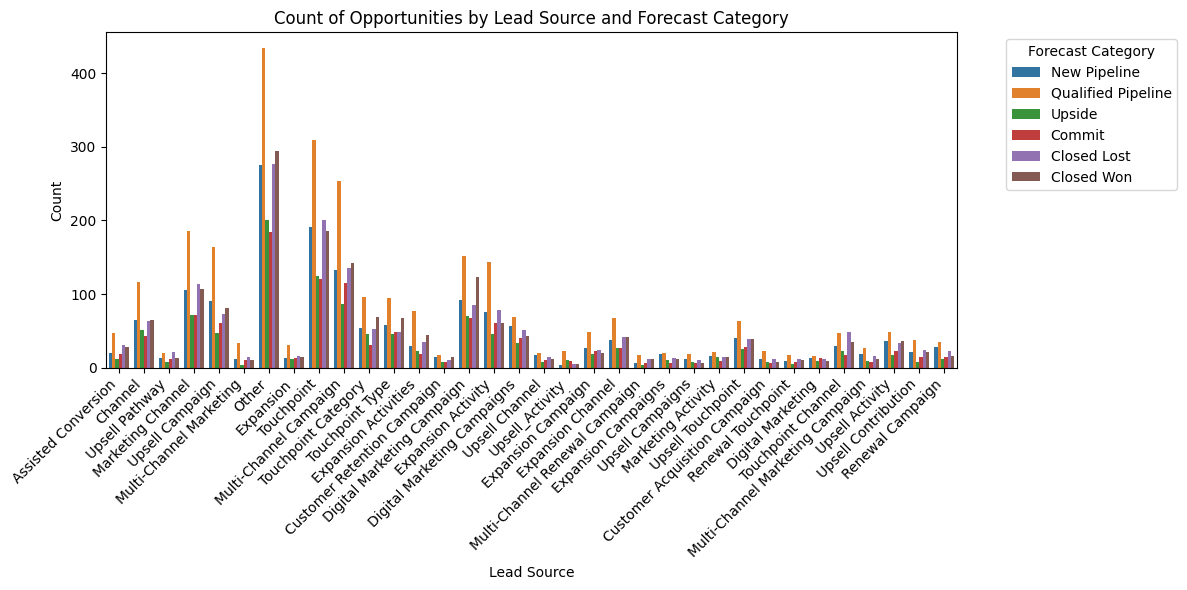

In [ ]:
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
sns.countplot(data=data, x='lead_source_bucketed', hue='opportunity_forecast_category',hue_order=forecast_order)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.xlabel('Lead Source')
plt.ylabel('Count')
plt.title('Count of Opportunities by Lead Source and Forecast Category')
plt.legend(title='Forecast Category', bbox_to_anchor=(1.05, 1), loc='upper left') # Position legend outside the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Another common visualization is a pareto chart. The pareto principles states that 20% of activity is responsible for 80% of impact which is shown in this visualization. The lead source "Touchpoint" has over 80% cumulative percentage of opportunities generated. Perhaps in this fictitious company, a customer success or account management touchpoint is the most lucrative activity that brings more expansion or upsell opportunities.

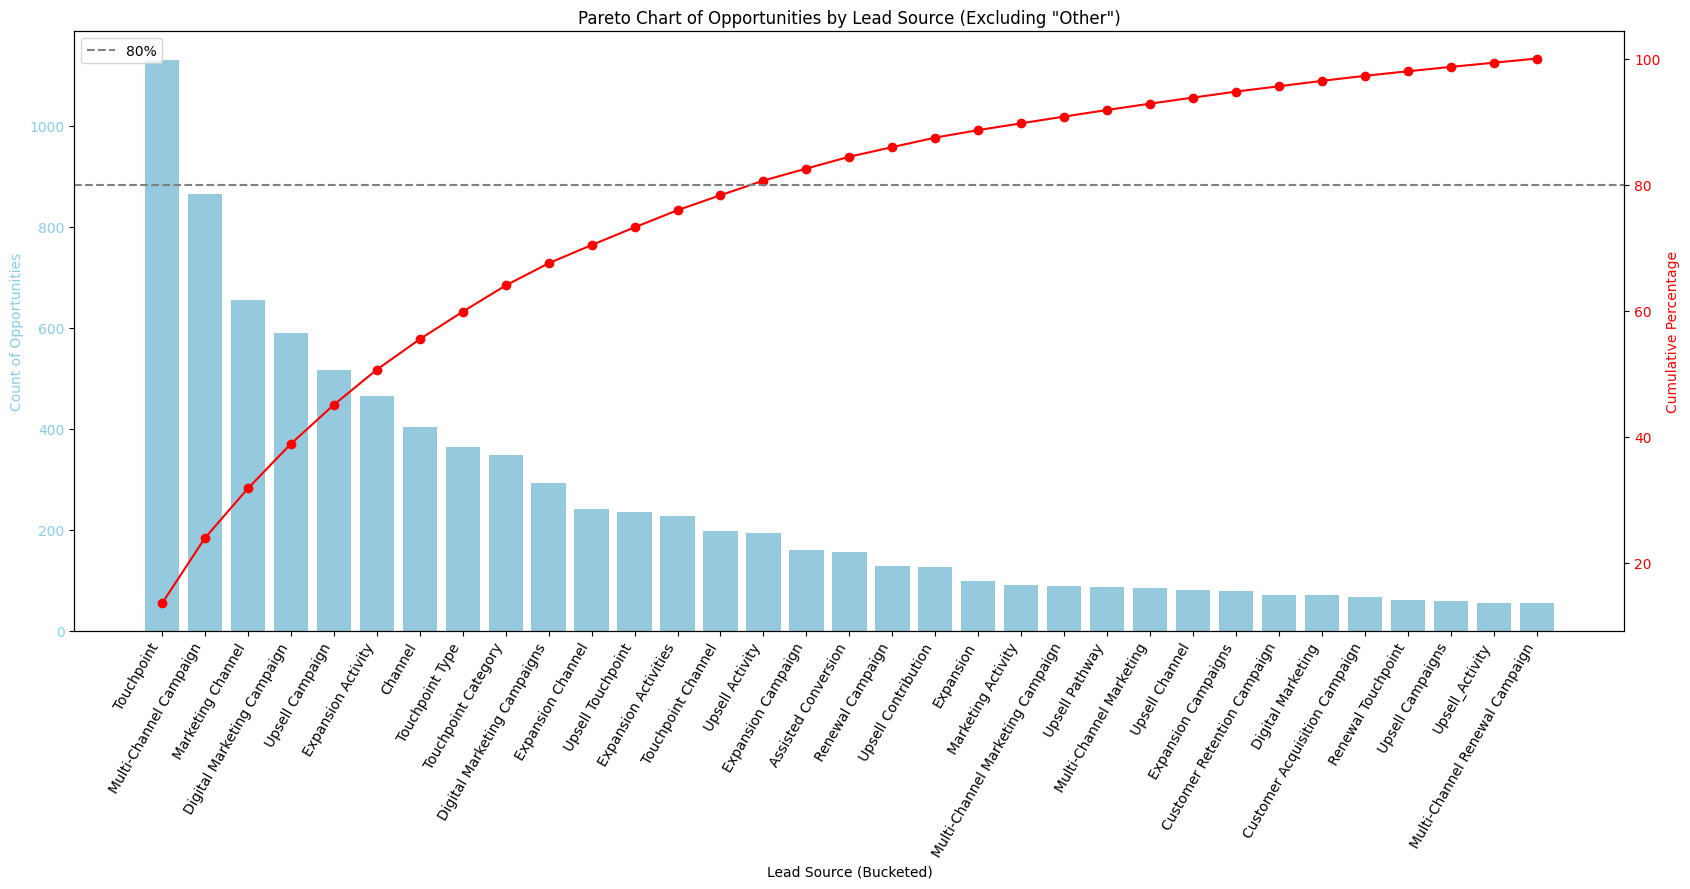

In [ ]:
# Calculate the count of opportunities for each lead source, excluding 'Other'
lead_source_counts = data[data['lead_source_bucketed'] != 'Other']['lead_source_bucketed'].value_counts()

# Calculate the cumulative percentage based on the counts excluding 'Other'
cumulative_percentage = lead_source_counts.cumsum() / lead_source_counts.sum() * 100

# Sort the lead sources by count in descending order for better Pareto chart visualization
lead_source_counts = lead_source_counts.sort_values(ascending=False)
cumulative_percentage = cumulative_percentage.reindex(lead_source_counts.index) # Reindex cumulative percentage to match sorted counts

# Create a figure and a secondary y-axis
fig, ax1 = plt.subplots(figsize=(17, 9)) # Increase figure size

# Create the bar chart on the primary axis (counts)
sns.barplot(x=lead_source_counts.index, y=lead_source_counts.values, ax=ax1, color='skyblue')
ax1.set_xlabel('Lead Source (Bucketed)')
ax1.set_ylabel('Count of Opportunities', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.tick_params(axis='x', rotation=60)

# Set the horizontal alignment for the x-axis labels using plt.xticks
plt.xticks(rotation=60, ha='right')

# Create the line chart on the secondary axis (cumulative percentage)
ax2 = ax1.twinx()
ax2.plot(cumulative_percentage.index, cumulative_percentage.values, color='red', marker='o')
ax2.set_ylabel('Cumulative Percentage', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a dashed line at 80% for reference
ax2.axhline(80, color='gray', linestyle='--', label='80%')
ax2.legend()

plt.title('Pareto Chart of Opportunities by Lead Source (Excluding "Other")')
plt.tight_layout()
plt.show()

As a follow up project, I'd like to do a pipeline coverage analysis and this is a nice visualization for starters.

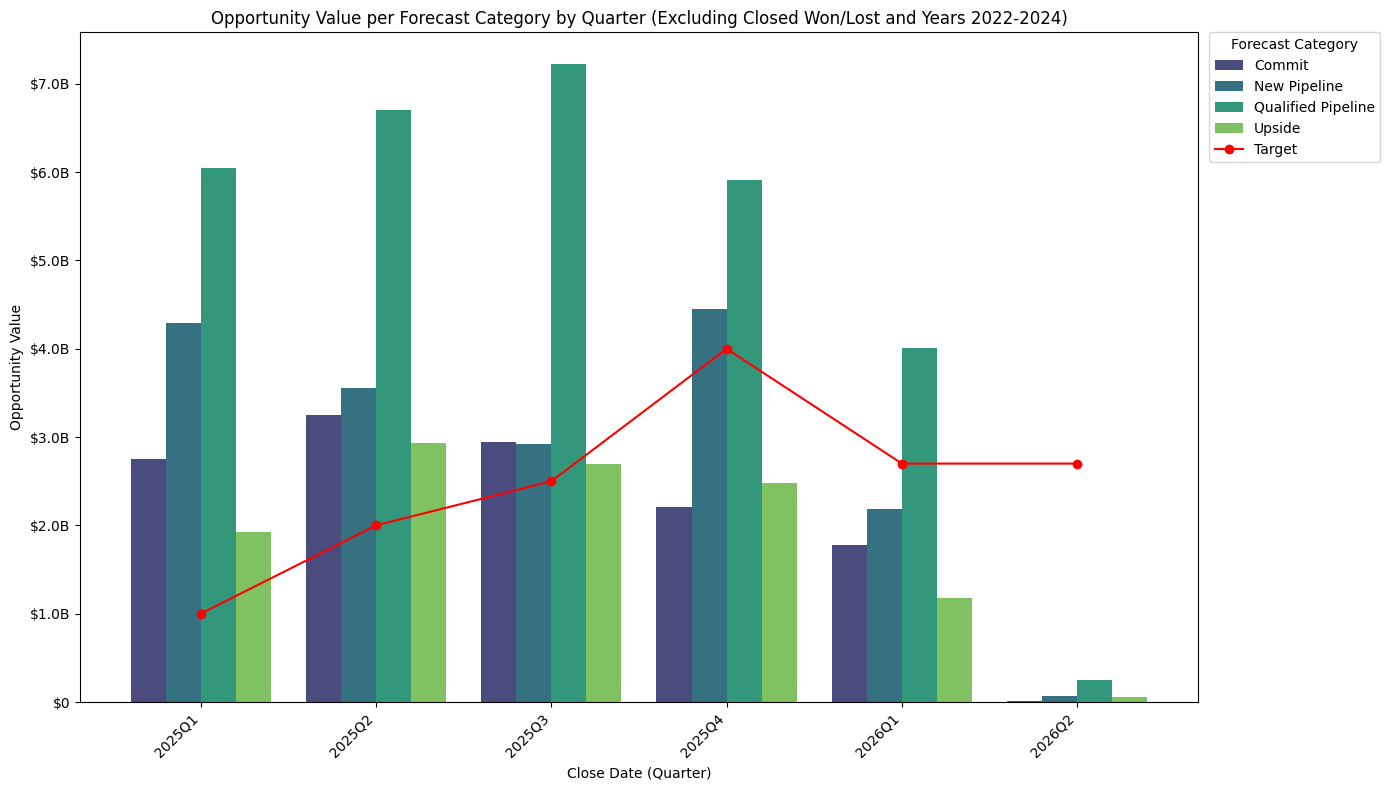

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Filter data to exclude "Closed Won" and "Closed Lost" forecast categories
filtered_data_viz = data[~data['opportunity_forecast_category'].isin(['Closed Won', 'Closed Lost'])].copy()

# Filter out years 2022, 2023, 2024 from 'opp_close_date'
filtered_data_viz = filtered_data_viz[~filtered_data_viz['opp_close_date'].dt.year.isin([2022, 2023, 2024])].copy()


# Create a 'Quarter' column
filtered_data_viz['Quarter'] = filtered_data_viz['opp_close_date'].dt.to_period('Q').astype(str)

# Group by Quarter and Forecast Category and sum opp_value
grouped_data = filtered_data_viz.groupby(['Quarter', 'opportunity_forecast_category'])['opp_value'].sum().reset_index()

# Define the order of quarters for sorting
from pandas.api.types import CategoricalDtype
quarter_order = pd.unique(filtered_data_viz['Quarter']).tolist()
quarter_order.sort() # Sort quarters chronologically

quarter_dtype = CategoricalDtype(categories=quarter_order, ordered=True)
grouped_data['Quarter'] = grouped_data['Quarter'].astype(quarter_dtype)

# Sort the data by Quarter
grouped_data = grouped_data.sort_values(by='Quarter')

# Function to format currency
def currency_formatter(x, pos):
    if x >= 1e9:
        return f'${x/1e9:.1f}B'
    elif x >= 1e6:
        return f'${x/1e6:.1f}M'
    elif x >= 1e3:
        return f'${x/1e3:.1f}K'
    else:
        return f'${x:.0f}'

# Create the bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=grouped_data, x='Quarter', y='opp_value', hue='opportunity_forecast_category', palette='viridis')

# Add target line data
target_data = {
    '2025Q1': 1e9,
    '2025Q2': 2e9,
    '2025Q3': 2.5e9,
    '2025Q4': 4e9,
    '2026Q1': 2.7e9,
    '2026Q2': 2.7e9
}
target_df = pd.DataFrame.from_dict(target_data, orient='index', columns=['target_value']).reset_index().rename(columns={'index': 'Quarter'})
target_df['Quarter'] = target_df['Quarter'].astype(quarter_dtype)
target_df = target_df.sort_values(by='Quarter')

# Superimpose the target line
plt.plot(target_df['Quarter'], target_df['target_value'], color='red', marker='o', linestyle='-', label='Target')


plt.xlabel('Close Date (Quarter)')
plt.ylabel('Opportunity Value')
plt.title('Opportunity Value per Forecast Category by Quarter (Excluding Closed Won/Lost and Years 2022-2024)')
plt.xticks(rotation=45, ha='right')

# Apply currency formatting to the y-axis
bar_plot.yaxis.set_major_formatter(plt.FuncFormatter(currency_formatter))

# Move legend to the right with enough space
plt.legend(title='Forecast Category', bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()
